## EDA

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [33]:
df2015 = pd.read_csv('Data/TouristArrival2015.csv')
df2016 = pd.read_csv('Data/TouristArrival2016.csv')
df2017 = pd.read_csv('Data/TouristArrival2017.csv')
df2018 = pd.read_csv('Data/TouristArrival2018.csv')
df2019 = pd.read_csv('Data/TouristArrival2019.csv')
df2020 = pd.read_csv('Data/TouristArrival2020.csv')
dfAirPassenger = pd.read_csv('Data/thailand_air_passengers.csv')
dfDT = pd.read_csv('Data/thailand_domestic_tourism_2019_2023_ver2.csv')
dfDT

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,ratio_tourist_stay,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,ratio_tourist_stay,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,ratio_tourist_stay,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,ratio_tourist_stay,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,ratio_tourist_stay,79.31
...,...,...,...,...,...,...,...
30795,2022-12-01,อุบลราชธานี,Ubon Ratchathani,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,2480000.00
30796,2022-12-01,สกลนคร,Sakon Nakhon,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,3520000.00
30797,2022-12-01,ยโสธร,Yasothon,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,210000.00
30798,2022-12-01,อำนาจเจริญ,Amnat Charoen,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,660000.00


In [34]:
print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)
print(df2020.shape)
print(dfAirPassenger.shape)
print(dfDT.shape)
print(df2015.dtypes)
print(df2016.dtypes)
print(df2017.dtypes)
print(df2018.dtypes)
print(df2020.dtypes)
print(dfAirPassenger.dtypes)
print(dfDT.dtypes)
dfList = {'2015':df2015, '2016':df2016, '2017':df2017, '2018':df2018, '2019':df2019, '2020':df2020, 'AP':dfAirPassenger, 'DT':dfDT}

(54, 8)
(54, 8)
(54, 8)
(54, 8)
(54, 8)
(26, 4)
(30800, 7)
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Receipts(Mil. $US)        object
Region                            object
dtype: object
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Receipts(Mil. $US)        object
Region                            object
dtype: object
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Rec

In [35]:
toChange = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)']
for key in dfList.keys():
    df = dfList[key]
    for temp in toChange:
        try:
            df[temp] = df[temp].str.replace(",", "")
            df[temp] = pd.to_numeric(df[temp], errors="coerce")
        except:
            continue
    missing_values = df.isna()
    missing_counts = df.isna().sum()
    total_missing = df.isna().sum().sum()
    print(total_missing)
    print(key)
    print('-----------------------------')

0
2015
-----------------------------
0
2016
-----------------------------
0
2017
-----------------------------
0
2018
-----------------------------
0
2019
-----------------------------
0
2020
-----------------------------
0
AP
-----------------------------
0
DT
-----------------------------


In [36]:
df2018["year"] = 2018
df2019["year"] = 2019
df2020["year"] = 2020
df2017["year"] = 2017
df2016["year"] = 2016
df2015["year"] = 2015

dfNationality = pd.concat([df2015, df2016, df2017, df2018, df2019, df2020], ignore_index=True)
dfList['integrated']=dfNationality
dfNationality
numList = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Per Capita Spending($US/Day)', 'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)']

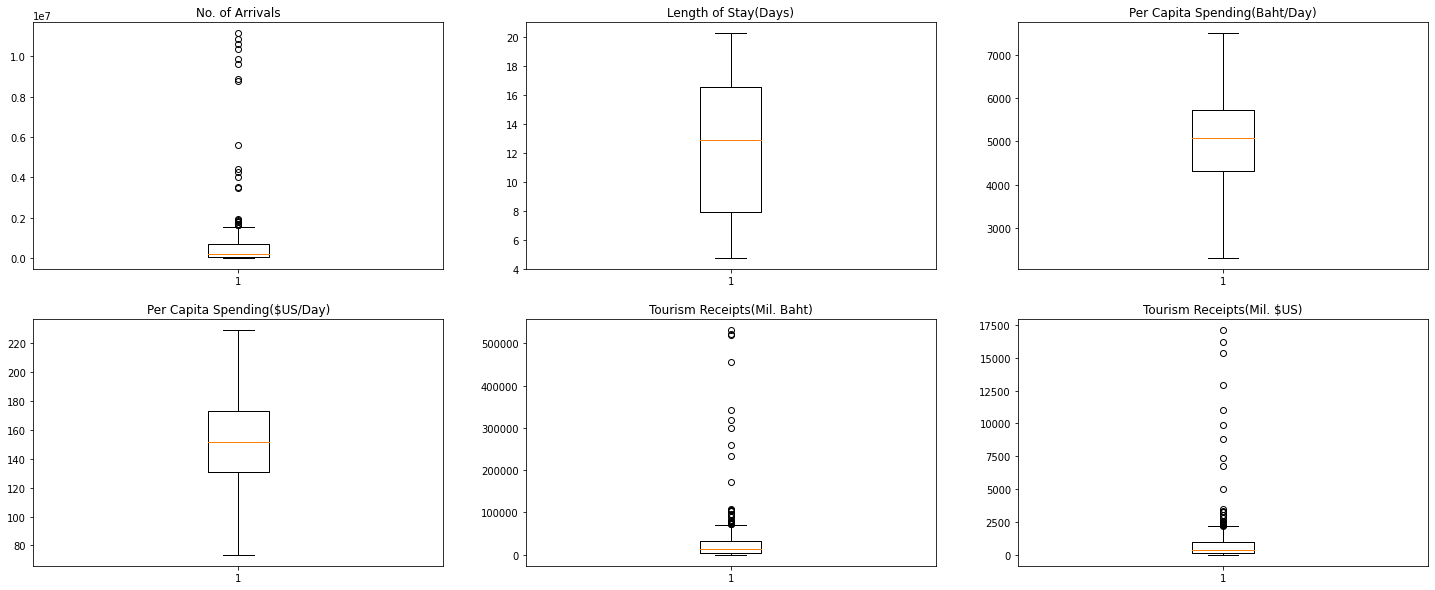

In [37]:
import matplotlib.pyplot as plt

Regions = dfNationality['Region'].unique().tolist()
Countries = dfNationality['Country of Residence'].unique().tolist()
Years = [2015, 2016, 2017, 2018, 2019, 2020]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
i=0
for field in numList:
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(dfNationality[field])
    axes[row, col].set_title(field)
    i+=1
plt.show()

<Figure size 2520x1296 with 0 Axes>

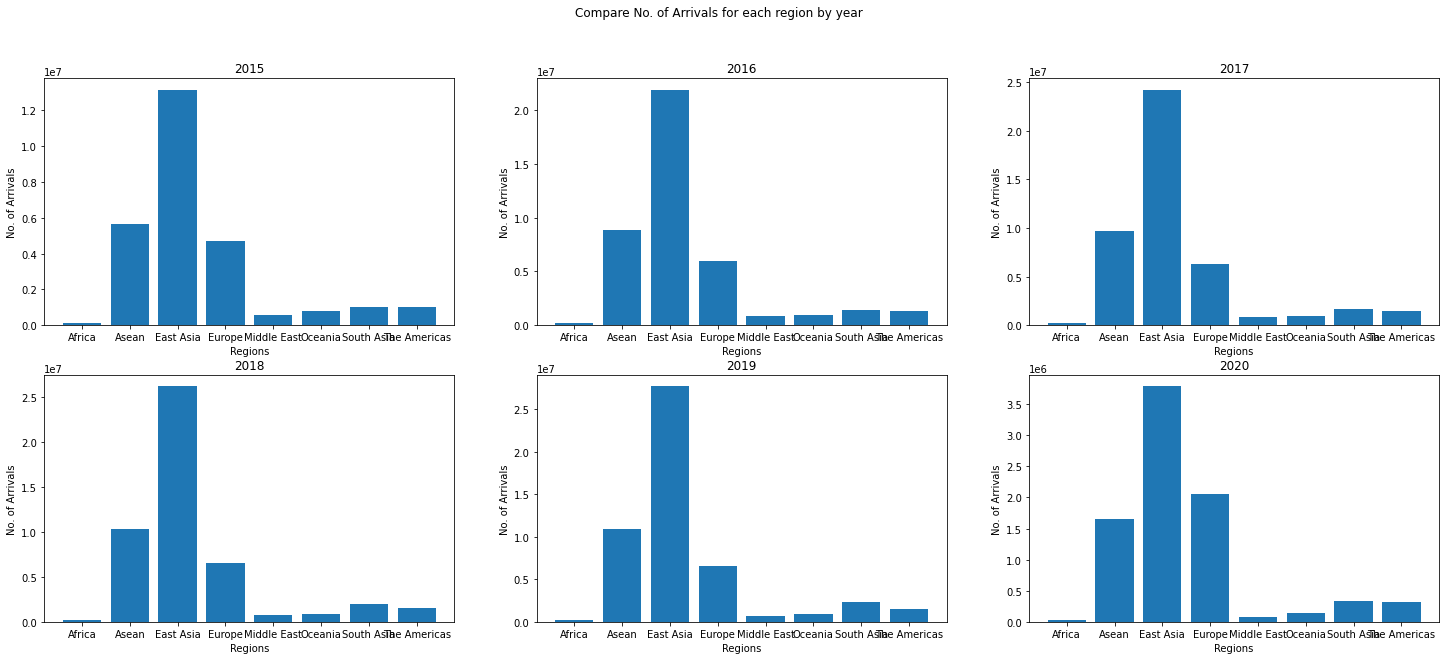

<Figure size 2160x1296 with 0 Axes>

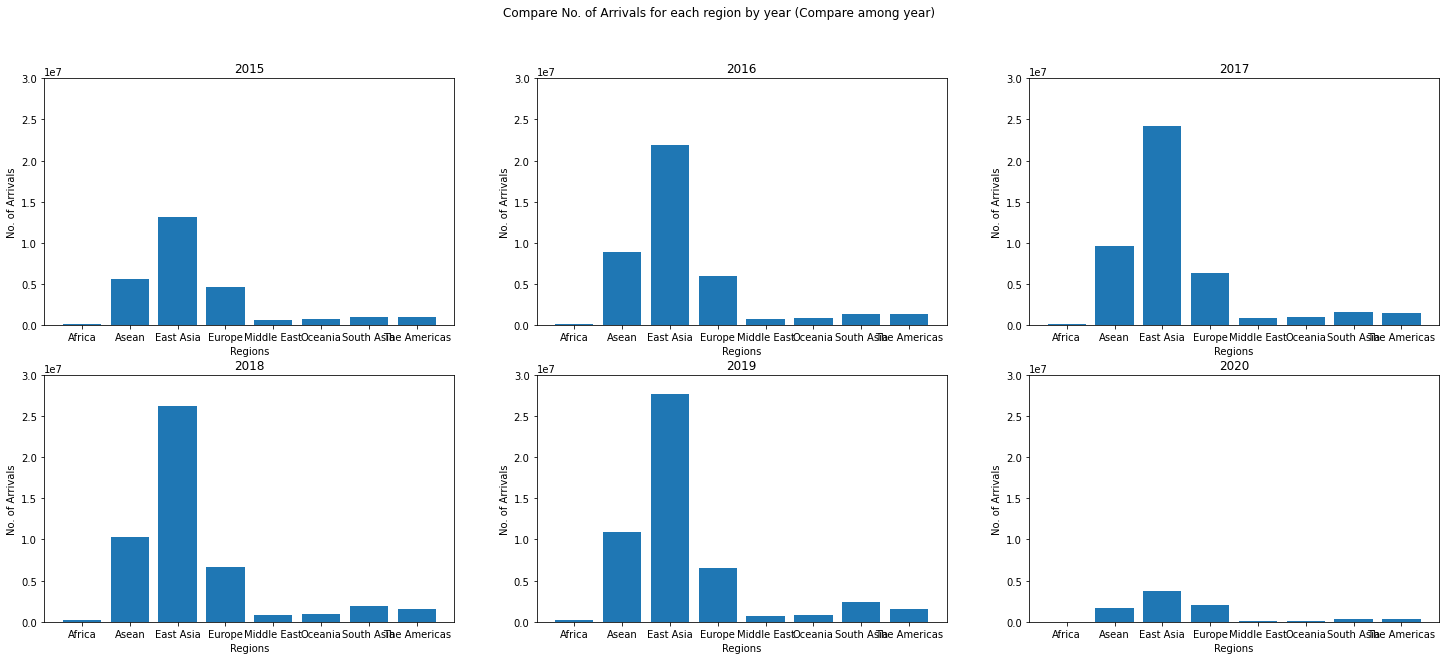

In [38]:

plt.figure(figsize=(35, 18))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
i=0
for year in Years:
    row = i // 3
    col = i % 3
    region_totals = dfList[str(year)].groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    i+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year')
plt.show()


plt.figure(figsize=(30, 18))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
i=0
for year in Years:
    row = i // 3
    col = i % 3
    region_totals = dfList[str(year)].groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    axes[row, col].set_ylim(0, 30000000)
    i+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year (Compare among year)')
plt.show()

<Figure size 2520x1296 with 0 Axes>

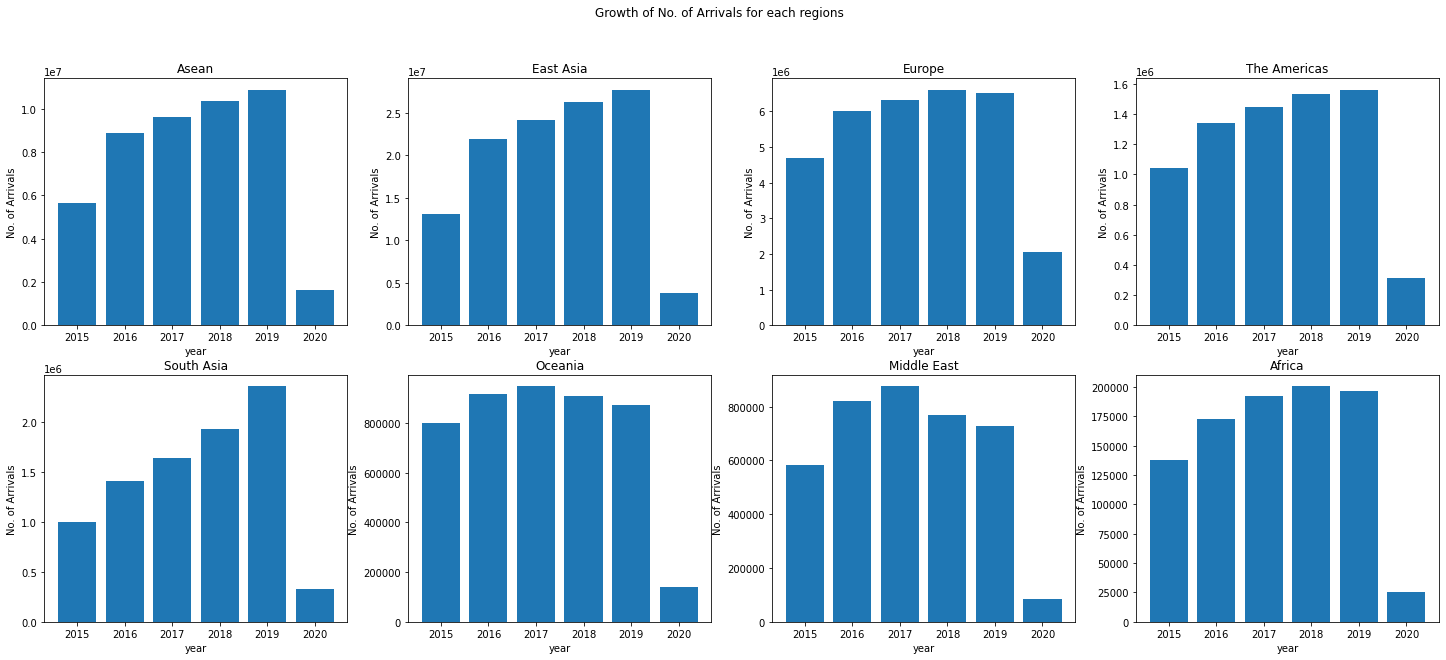

<Figure size 2520x1296 with 0 Axes>

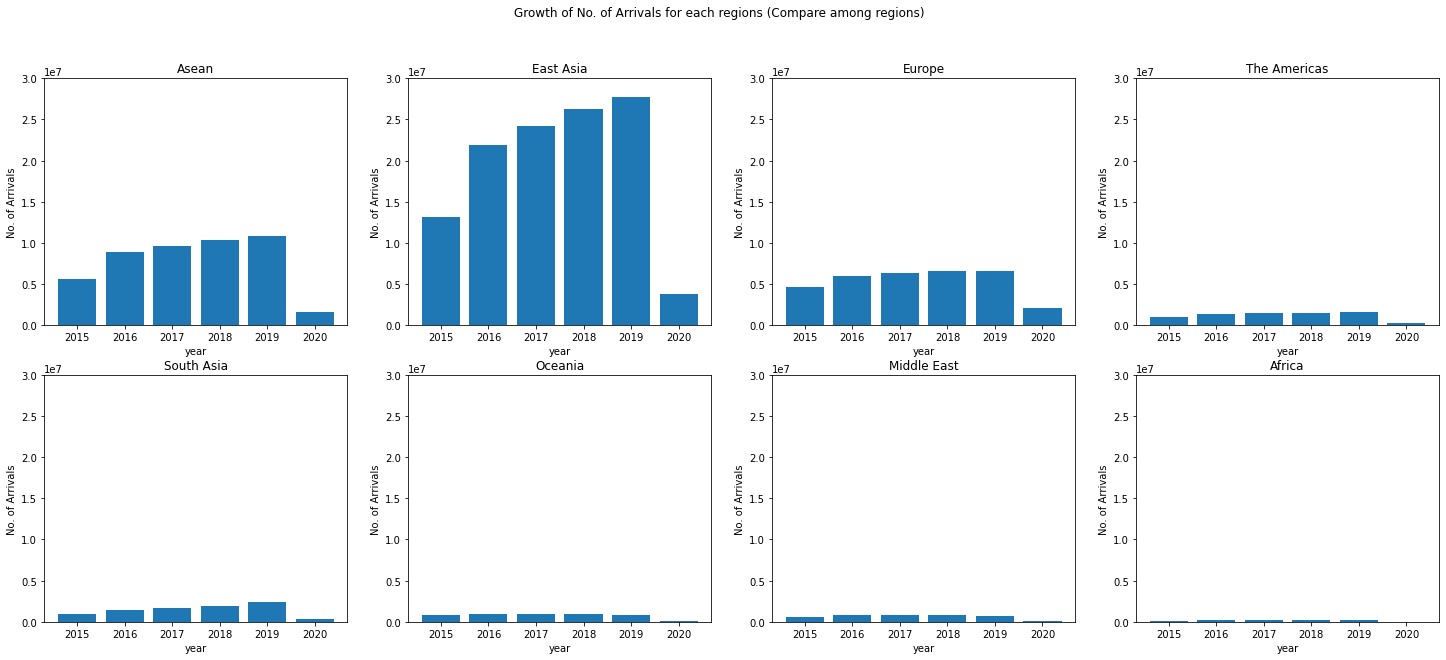

In [39]:
plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    # axes[row, col].set_ylim(0, 30000000)
    i+=1
plt.suptitle('Growth of No. of Arrivals for each regions')
plt.show()


plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    axes[row, col].set_ylim(0, 30000000)
    i+=1

plt.suptitle('Growth of No. of Arrivals for each regions (Compare among regions)')
plt.show()

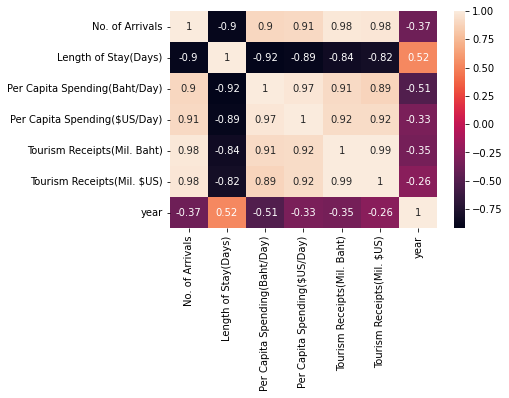

In [40]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()